In [1]:
import os 
from ultralytics import YOLO
import numpy as np
from PIL import Image
import random
import os
from typing import List
from typing import Union
from PIL import Image, ImageOps
import numpy as np
from hp.yolo_results import YOLOResults
from hp.utils import *

In [2]:
model_id = "weights/yolo-human-parse-v2.pt"
model = YOLO(model_id, task='segment')


0: 1024x1024 2 hairs, 1 face, 1 neck, 1 hand, 1 outfit, 1 shoe, 231.8ms
Speed: 4.8ms preprocess, 231.8ms inference, 16.7ms postprocess per image at shape (1, 3, 1024, 1024)


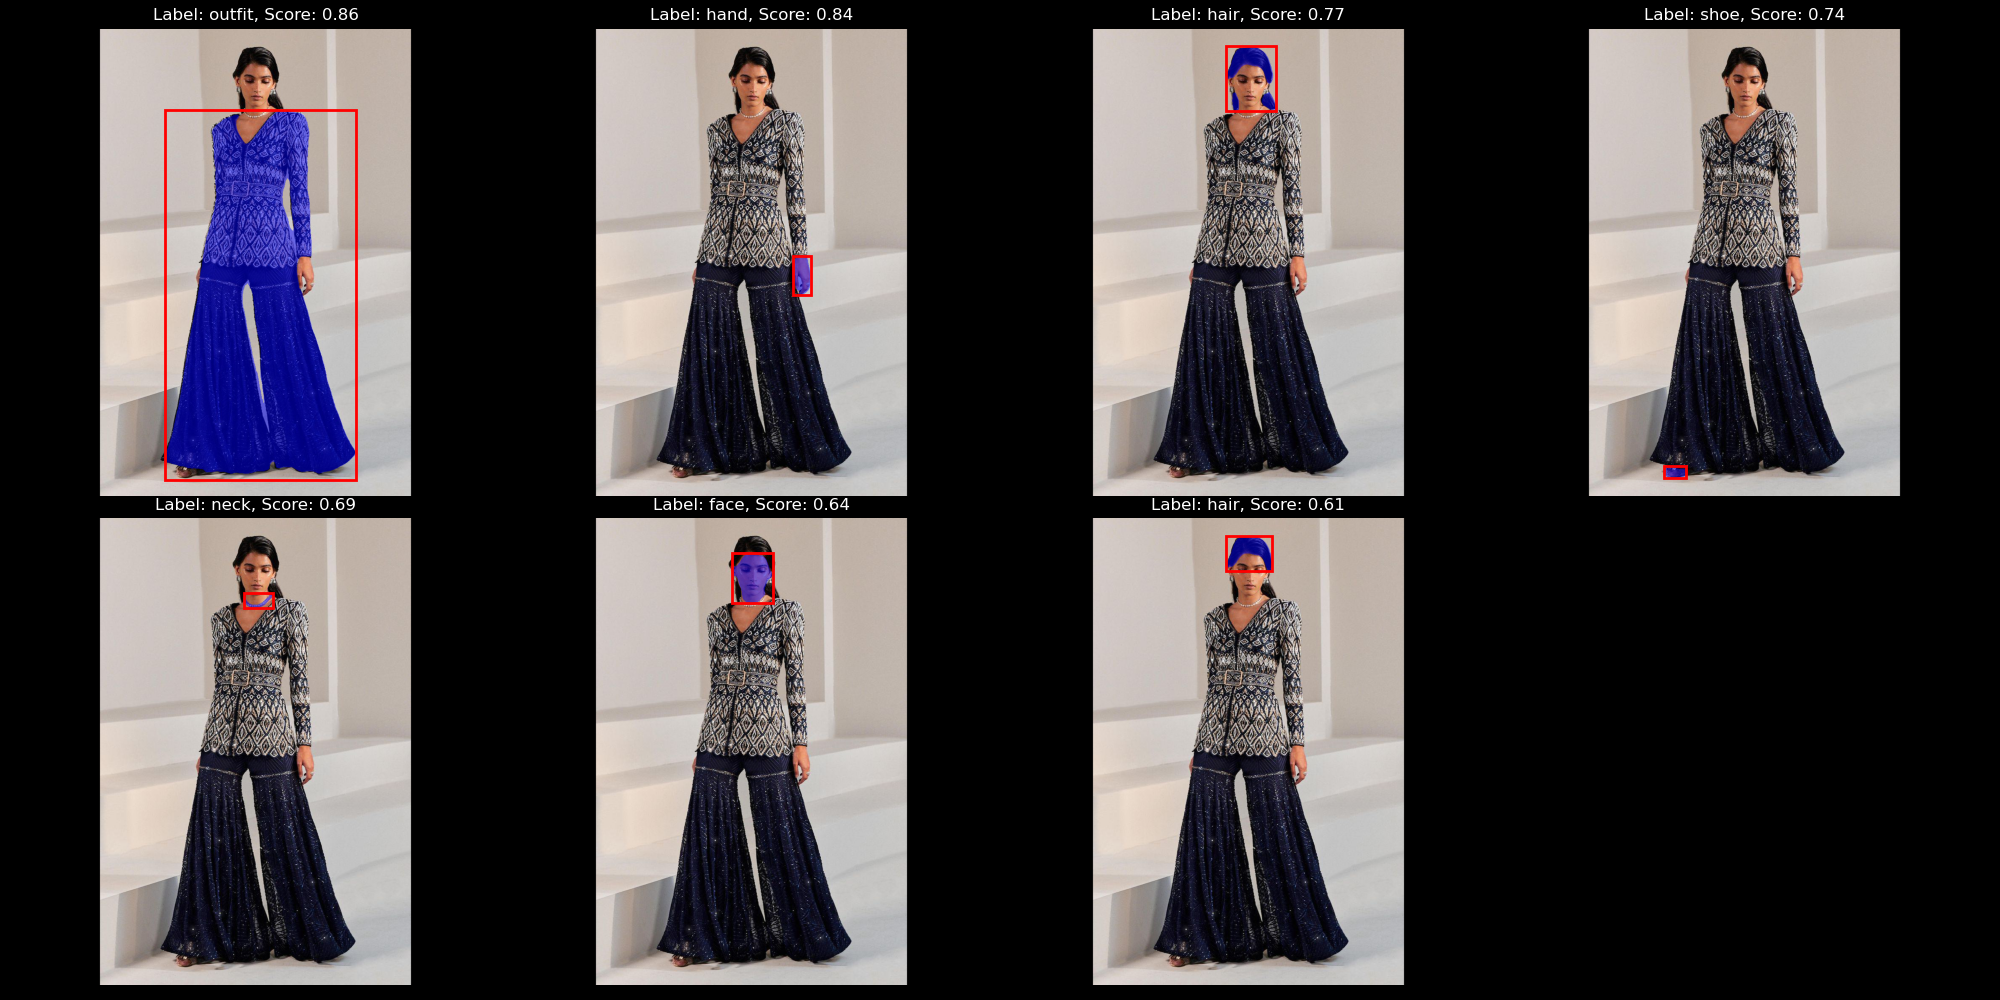

In [3]:
example_images = [
    os.path.join("sample_images", f)
    for f in os.listdir("sample_images")
    if f.endswith((".png", ".jpg", ".jpeg"))
]

image = example_images[4]

image = load_resize_image(image, 1024)
imgsz = max(image.size)

result = model(image, imgsz=imgsz, retina_masks=True)
r = YOLOResults(image, result)
plot = r.visualize(return_image=True)
plot